# Purpose

Perform Multi-linear Regression on a dataset to predict a cars MPG<br>
<br>
**What to expect:**<br>
Data entry<br>
Data cleaning and transforming<br>
Data analysis<br>
Model building

## About the Data
**8 variables:**<br> 
MPG (miles per gallon)<br>
cylinders<br> 
engine displacement (cu. inches)<br> 
horsepower<br>
vehicle weight (lbs.)<br> 
time to accelerate from O to 60 mph (sec.)<br>
model year (modulo 100)<br>
origin of car (1. American, 2. European, 3. Japanese)<br>
car name<br>
Missing data values are marked by series of question marks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import itertools

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [3]:
df1 = pd.read_csv('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\auto-mpg.csv')

In [4]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Dataframe analysis for missing values, dtypes, dataframe shape, unique values, etc.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Note that hoursepower is a object value when it should be a numberic dtype**

In [6]:
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Unique values analysis

In [7]:
col = df1.columns

In [8]:
for i in col:
    if len(df1[i].unique()) < 500:
        print('The unique values in column **',i,'** are:',df1[i].unique())
        print('The number of unique values in column **',i,'** are:',len(df1[i].unique()))
        print('')
    else:
        print('The number of unique values in column **',i,'** are:',len(df1[i].unique()))
        print('')

The unique values in column ** mpg ** are: [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
The number of unique values in column ** mpg ** are: 129

The unique values in column ** cylinders ** are: [8 4 6 3 5]
The number of unique values in column ** cylinders ** are: 5

The unique values in column ** displacement ** are: [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  34

**Horse power has a ? in its featuer column which explians why it was an object**<br>
**Also, car name is not useful feature for our model**

### Addressing incorrect values in a numeric column

In [9]:
df1[(df1['horsepower']=='?')]['horsepower'].count()

6

In [10]:
df1[(df1['horsepower'].str.isdigit())==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


**There are six question marks in the horsepower feature column**

In [11]:
df1['horsepower'].replace('?', np.nan, inplace=True)

In [12]:
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

**Filling the NaN values with the median horsepower**

In [13]:
df1['horsepower'].median()

93.5

In [14]:
df1['horsepower'].fillna(df1['horsepower'].median(), inplace=True)
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Changing horsepower to a float dtype

In [15]:
df1['horsepower'] = df1['horsepower'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


**Dropping car name from the dataframe because it is not useful for predicting mpg**

In [16]:
df1.drop('car name', axis=1, inplace=True)

## Creating dummy variables for categorical features

**Replacing the numerical values in origin column to their string meaning**

1. American, 2. European, 3. Japanese

In [17]:
df1['origin'] = df1['origin'].replace({1:'america', 2:'europe', 3:'japan'})
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


In [18]:
df1['origin'].value_counts()

america    249
japan       79
europe      70
Name: origin, dtype: int64

**Making dummy variables so the model can process the values correctly.  Drop the first dummy variable column to avoid multicollinearity**

In [19]:
df1 = pd.get_dummies(data=df1, columns=['origin'], drop_first=True)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


# EDA

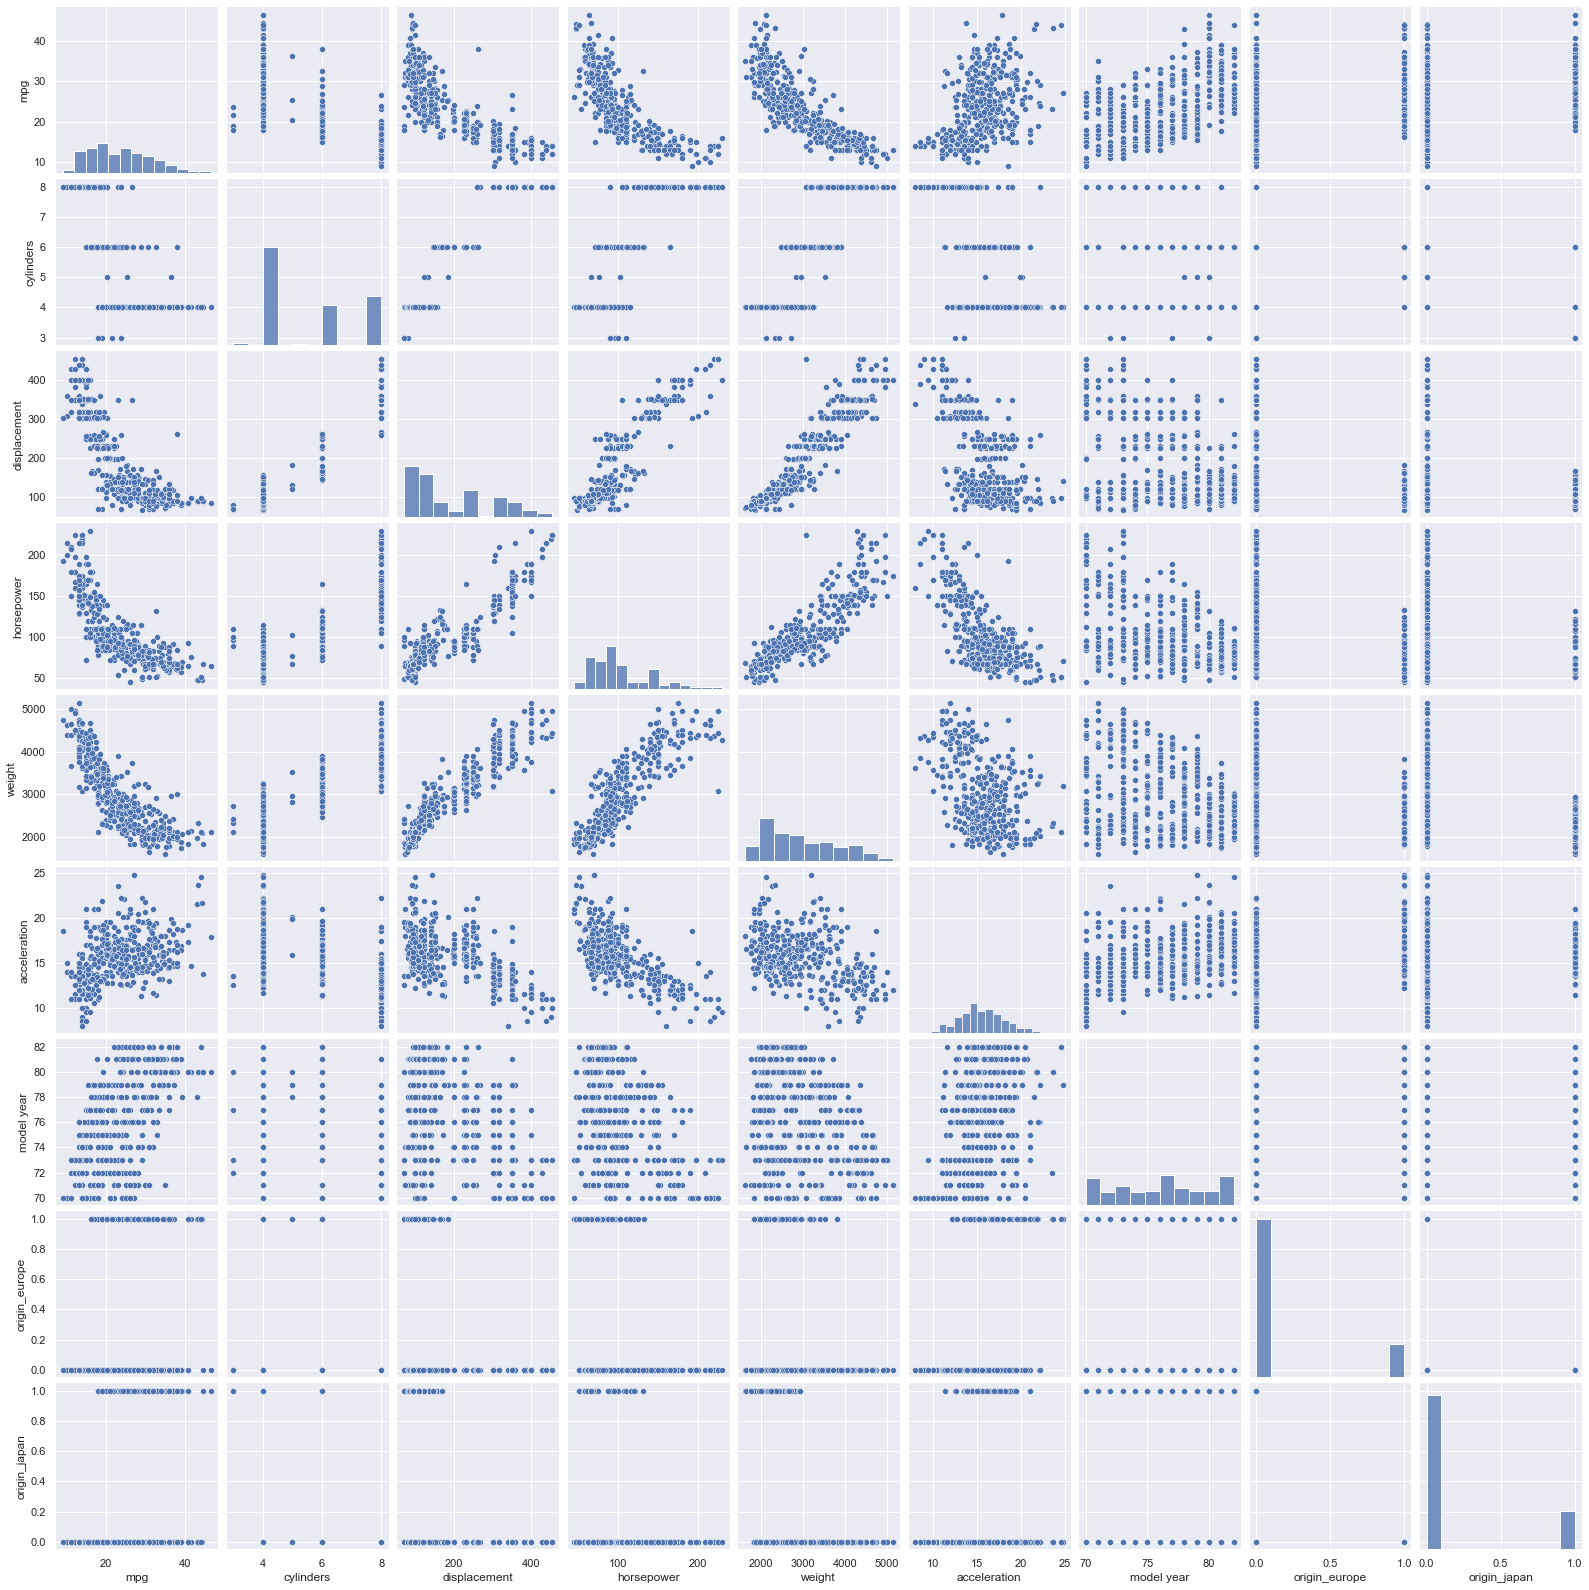

In [20]:
sns.pairplot(df1)

In [21]:
df1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_europe,origin_japan
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.373886,-0.433505
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.282877,-0.318972
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.024489,0.193101
origin_europe,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,1.000000,-0.229895
origin_japan,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,-0.229895,1.000000


<AxesSubplot:>

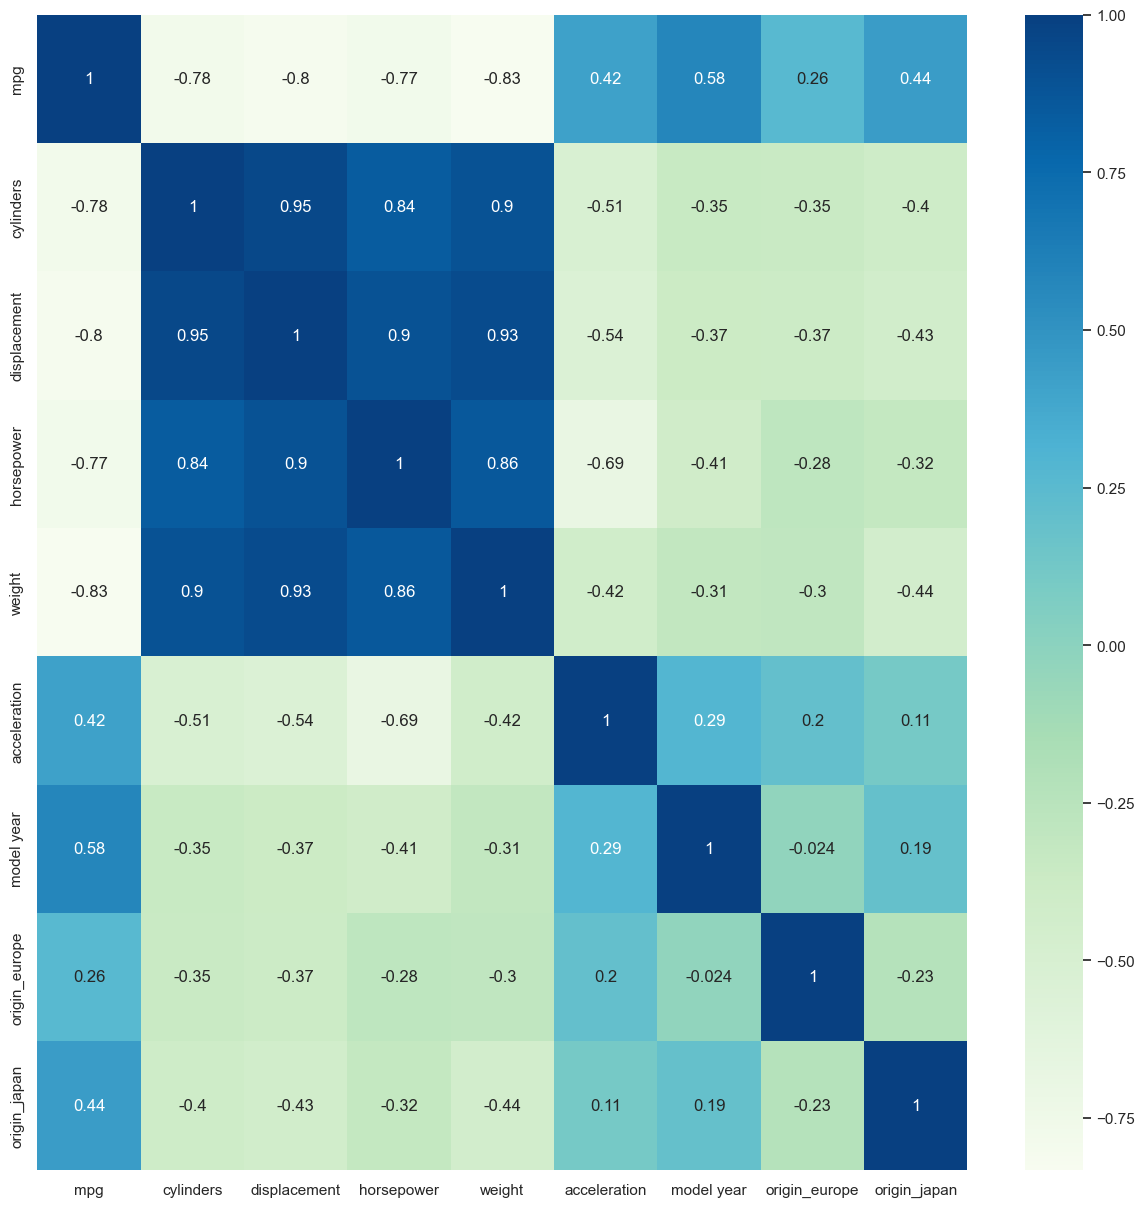

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True, cmap='GnBu')

**There are signs of possible multicollinearity**

mpg                 AxesSubplot(0.125,0.11;0.0731132x0.77)
cylinders        AxesSubplot(0.212736,0.11;0.0731132x0.77)
displacement     AxesSubplot(0.300472,0.11;0.0731132x0.77)
horsepower       AxesSubplot(0.388208,0.11;0.0731132x0.77)
weight           AxesSubplot(0.475943,0.11;0.0731132x0.77)
acceleration     AxesSubplot(0.563679,0.11;0.0731132x0.77)
model year       AxesSubplot(0.651415,0.11;0.0731132x0.77)
origin_europe    AxesSubplot(0.739151,0.11;0.0731132x0.77)
origin_japan     AxesSubplot(0.826887,0.11;0.0731132x0.77)
dtype: object

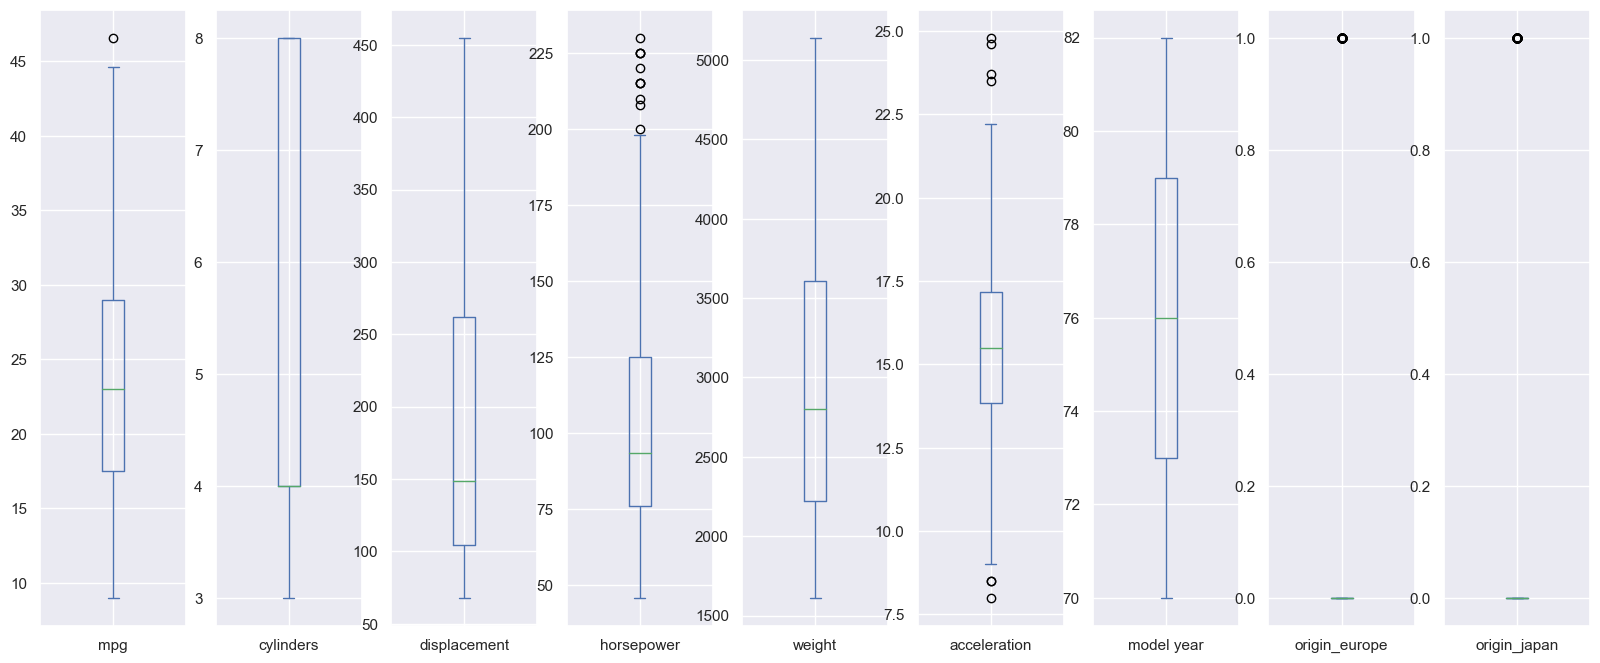

In [23]:
df1.plot(kind='box', figsize=(20,8), subplots=True, sharex=False, sharey=False)

# The Regression Model

In [24]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


In [25]:
## Splitting data for training and testing

In [26]:
X = df1.drop('mpg', axis=1)
y = df1['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

### Coefficients and Intercept

In [27]:
for idx, col_name in enumerate(X_train.columns):
    print('Coeff for',col_name,':',lr.coef_[idx])
print('intercept:',lr.intercept_)

Coeff for cylinders : -0.5492126328281324
Coeff for displacement : 0.030888627245805243
Coeff for horsepower : -0.022520251801395497
Coeff for weight : -0.007156664222400736
Coeff for acceleration : 0.151301248902794
Coeff for model year : 0.8047991661451962
Coeff for origin_europe : 3.320776885108556
Coeff for origin_japan : 3.523697695282228
intercept: -20.605604854019074


<AxesSubplot:ylabel='mpg'>

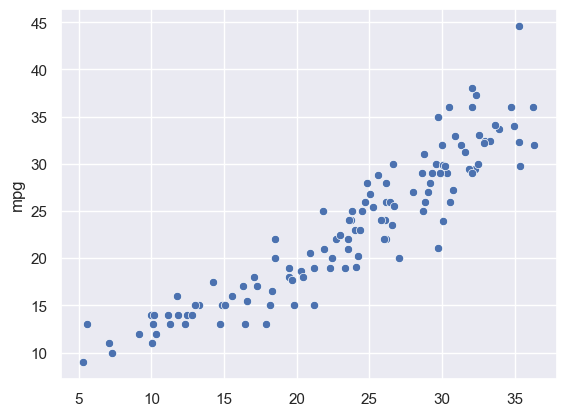

In [28]:
sns.scatterplot(x=y_pred, y=y_test)

### Model R Squared and RMSE

In [29]:
print('R2:',lr.score(X_test,y_test))
print('RMSE:',np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred)))

R2: 0.8416015288651154
RMSE: 3.01987893412635
